#### Libraries

In [163]:
#Import Libraries
import os
from pathlib import Path
import json
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import hvplot
import hvplot.pandas
from alpha_vantage.cryptocurrencies import CryptoCurrencies
%matplotlib inline

In [164]:
# API Keys
load_dotenv("../../WBF.env")
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
api_key = os.getenv('alpha_api_key')
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

## Pulling Data for Stocks, ETFs, S&P 500, and Crypto

### Stock Data

In [165]:
end = pd.Timestamp("2021-04-30", tz="America/New_York").isoformat()
start = pd.Timestamp("2019-11-30", tz="America/New_York").isoformat()
timeframe = "1D"
tickers = ['MSFT', 'DIS', 'NFLX', 'MA', 'XOM']
stock_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df
stock_df.index = stock_df.index.date

stock_closing = pd.DataFrame()
stock_closing["MSFT"] = stock_df["MSFT"]["close"]
stock_closing["DIS"] = stock_df["DIS"]["close"]
stock_closing["NFLX"] = stock_df["NFLX"]["close"]
stock_closing["MA"] = stock_df["MA"]["close"]
stock_closing["XOM"] = stock_df["XOM"]["close"]

stock_returns = stock_closing.pct_change().dropna()
stock_returns['Stock Avg'] = stock_returns.mean(numeric_only=True, axis=1)
stock_returns.sort_index(inplace=True)

In [166]:
stock_returns.head(3)

,MSFT,DIS,NFLX,MA,XOM,Stock Avg
2019-12-03,-0.001538,-0.013930,-0.012548,0.001116,-0.007890,-0.006958
2019-12-04,0.003415,-0.002489,-0.006043,-0.000731,0.011046,0.001039
2019-12-05,0.000601,-0.005598,-0.004634,0.010806,-0.003496,-0.000464


### ETF's

In [167]:
end_date = pd.Timestamp("2021-04-30", tz="America/New_York").isoformat()
start_date = pd.Timestamp("2019-11-30", tz="America/New_York").isoformat()
tickers = ["SPY", "LQD", "UNG", "PFE", "VNQ"]
timeframe = "1D"
etfs = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df
etfs.index = etfs.index.date
eft_closing_prices_df = pd.DataFrame()

eft_closing_prices_df["LQD"] = etfs["LQD"]["close"]
eft_closing_prices_df["PFE"] = etfs["PFE"]["close"]
eft_closing_prices_df["SPY"] = etfs["SPY"]["close"]
eft_closing_prices_df["UNG"] = etfs["UNG"]["close"]
eft_closing_prices_df["VNQ"] = etfs["VNQ"]["close"]

eft_returns = eft_closing_prices_df.pct_change().dropna()
eft_returns['ETF Avg'] = eft_returns.mean(numeric_only=True, axis=1)
eft_returns.sort_index(inplace=True)

In [168]:
eft_returns.head(3)

,LQD,PFE,SPY,UNG,VNQ,ETF Avg
2019-12-03,0.007871,-0.006527,-0.006836,0.043454,0.006547,0.008902
2019-12-04,-0.001406,0.002365,0.006463,-0.011746,0.004119,-0.000041
2019-12-05,-0.000938,-0.002884,0.001862,0.001080,0.000648,-0.000046


### S&P 500

In [169]:
csvpath = Path("SP500_PriceData - Sheet1 (3).csv")
sp500_df = pd.read_csv(csvpath)
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df.drop(columns=['Date'], inplace=True)
sp500_returns_df = sp500_df.pct_change()
sp500_returns_df = sp500_returns_df.rename(columns={"Close": "S&P 500"})
sp500_returns_df = sp500_returns_df.dropna()
sp500_returns_df.index = sp500_returns_df.index.date
sp500_returns_df.sort_index(inplace=True)

In [170]:
sp500_returns_df.head(3)

,S&P 500
2019-05-01,-0.007502
2019-05-02,-0.002124
2019-05-03,0.009638


### Crypto

In [171]:
cc = CryptoCurrencies(key=api_key, output_format='pandas')
btc_df, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='CNY')
eth_df, meta_data = cc.get_digital_currency_daily(symbol='ETH', market='CNY')
ltc_df, meta_data = cc.get_digital_currency_daily(symbol='LTC', market='CNY')
link_df, meta_data = cc.get_digital_currency_daily(symbol='LINK', market='CNY')
doge_df, meta_data = cc.get_digital_currency_daily(symbol='DOGE', market='CNY')

In [172]:
btc_df = pd.DataFrame(btc_df['4b. close (USD)'])
btc_df.index = btc_df.index.date
btc_df.columns = ["BTC close"]

eth_df = pd.DataFrame(eth_df['4b. close (USD)'])
eth_df.index = eth_df.index.date
eth_df.columns = ["ETH close"]

ltc_df = pd.DataFrame(ltc_df['4b. close (USD)'])
ltc_df.index = ltc_df.index.date
ltc_df.columns = ["LTC close"]

link_df = pd.DataFrame(link_df['4b. close (USD)'])
link_df.index = link_df.index.date
link_df.columns = ["LINK close"]

doge_df = pd.DataFrame(doge_df['4b. close (USD)'])
doge_df.index = doge_df.index.date
doge_df.columns = ["DOGE close"]

In [173]:
crypto_ohlc = pd.concat([btc_df, eth_df, ltc_df, link_df, doge_df], axis='columns', join='inner')

In [174]:
crypto_returns = crypto_ohlc.pct_change().dropna()
crypto_returns['Crypto Avg'] = crypto_returns.mean(numeric_only=True, axis=1)

In [175]:
crypto_returns.head(3)

,BTC close,ETH close,LTC close,LINK close,DOGE close,Crypto Avg
2019-07-06,0.026047,0.002852,-0.000338,-0.049368,-0.095631,-0.023287
2019-07-07,0.013303,0.056991,0.009889,-0.053550,0.010771,0.007481
2019-07-08,0.072974,0.023792,0.028791,0.018687,-0.022529,0.024343


### Portfolio Averages

In [176]:
data = [eft_returns['ETF Avg'], stock_returns['Stock Avg'], sp500_returns_df["S&P 500"], crypto_returns['Crypto Avg']]

headers = ["ETF Avg", "Stock Avg", "S&P 500", 'Crypto Avg']

avg_returns_df = pd.concat(data, axis=1, keys=headers, join='inner')

avg_returns_df.head()

,ETF Avg,Stock Avg,S&P 500,Crypto Avg
2019-12-03,0.008902,-0.006958,-0.006638,-0.005853
2019-12-04,-0.000041,0.001039,0.006324,-0.015190
2019-12-05,-0.000046,-0.000464,0.001500,0.008266
2019-12-06,-0.002032,0.009039,0.009136,0.016776
2019-12-09,-0.008266,-0.006045,-0.003163,-0.011540


# Risk Analysis

#### Standard Deviations

In [177]:
stock_std = pd.DataFrame(stock_returns.std())

etf_std = pd.DataFrame(eft_returns.std())

sp500_std = pd.DataFrame(sp500_returns_df.std())

crypto_std = pd.DataFrame(crypto_returns.std())

std_df = pd.concat([stock_std, etf_std, sp500_std, crypto_std], axis='rows', join='inner')

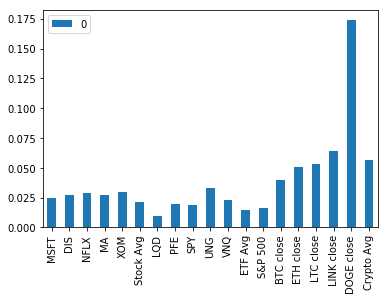

In [178]:
std_df.plot.bar()

#### Annualized STD

In [179]:
annualized_stock_std = stock_std * np.sqrt(252)
annualized_etf_std = etf_std * np.sqrt(252)
annualized_sp500_std = sp500_std * np.sqrt(252)
annualized_crypto_std = crypto_std * np.sqrt(365)

In [180]:
annualized_std_df = pd.concat([
    annualized_stock_std, annualized_etf_std, annualized_sp500_std, annualized_crypto_std], 
    axis='rows', join='inner')

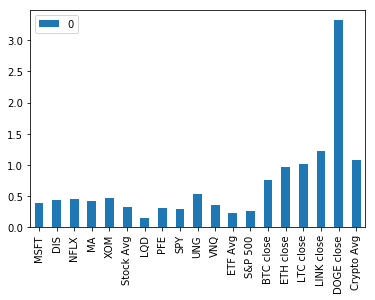

In [181]:
annualized_std_df.plot.bar()

### Rolling Standard Deviaitions

In [182]:
rolling_stock_std = stock_returns.rolling(window=20).std().dropna()
rolling_etf_std = eft_returns.rolling(window=20).std().dropna()
rolling_sp500_std = sp500_returns_df.rolling(window=20).std().dropna()
rolling_crypto_std = crypto_returns.rolling(window=20).std().dropna()

In [183]:
rolling_std_df = pd.concat([
    rolling_stock_std, rolling_etf_std, rolling_sp500_std, rolling_crypto_std], 
    axis='columns', join='inner')

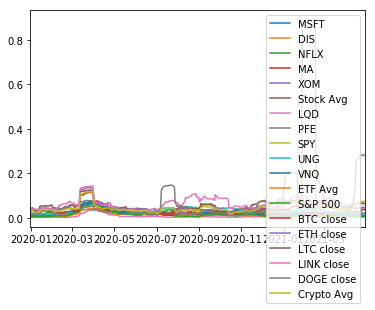

In [184]:
rolling_std_df.plot()

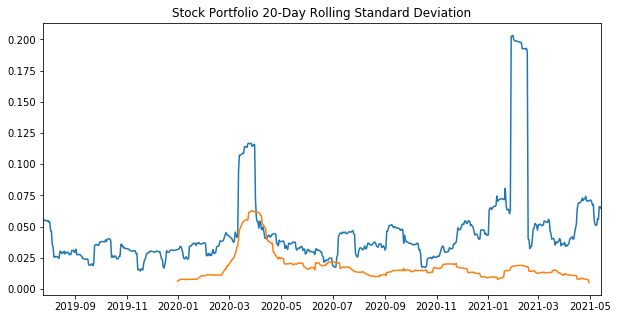

In [185]:
rolling_crypto_std['Crypto Avg'].plot(figsize=(10,5), 
                             title="Crypto Portfolio Average Standard Deveation, 20-day rolling")
rolling_stock_std['Stock Avg'].plot(figsize=(10,5), 
                                title="Stock Portfolio 20-Day Rolling Standard Deviation")

### Beta Analysis

In [218]:
# Beta for Stock Portfolio
rolling_covariance_stock = avg_returns_df['Stock Avg'].rolling(window=20).cov(avg_returns_df['S&P 500'])
rolling_variance_stock = avg_returns_df['S&P 500'].rolling(window=20).var()
beta_stock_rolling = rolling_covariance_stock / rolling_variance_stock


rolling_covariance_etf = avg_returns_df['ETF Avg'].rolling(window=20).cov(avg_returns_df['S&P 500'])
rolling_variance_etf = avg_returns_df['S&P 500'].rolling(window=20).var()
beta_etf_rolling = rolling_covariance_etf / rolling_variance_etf


rolling_covariance_crypto = avg_returns_df['Crypto Avg'].rolling(window=20).cov(avg_returns_df['S&P 500'])
rolling_variance_crypto = avg_returns_df['S&P 500'].rolling(window=20).var()
beta_crypto_rolling = rolling_covariance_crypto / rolling_variance_crypto



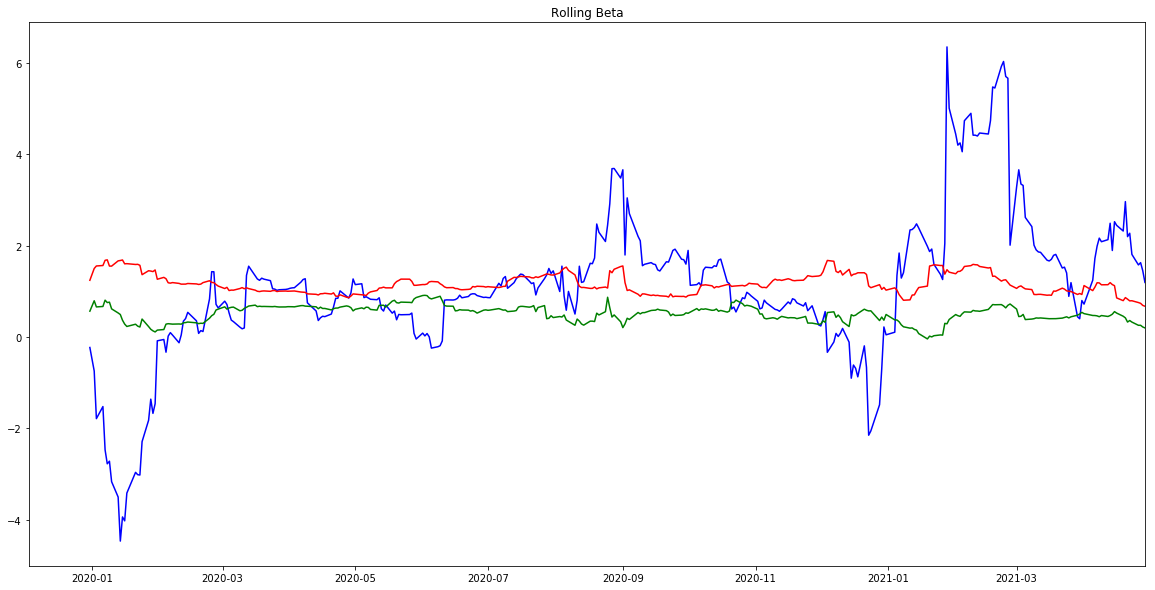

In [230]:
beta_crypto_rolling.plot(figsize=(20, 10), color = 'blue', title='Rolling Beta')
beta_etf_rolling.plot(color = 'green')
beta_stock_rolling.plot(color = 'red')

In [231]:
beta_df = pd.concat([
    beta_stock_rolling, beta_etf_rolling, beta_crypto_rolling], 
    axis='columns', join='inner')

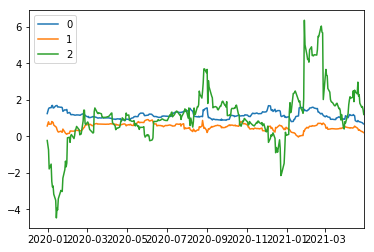

In [232]:
beta_df.plot()

In [233]:
variance = avg_returns_df['S&P 500'].var()

covariance_stock = avg_returns_df['Stock Avg'].cov(avg_returns_df['S&P 500'])
beta_stock = covariance_stock / variance


covariance_etf = avg_returns_df['ETF Avg'].cov(avg_returns_df['S&P 500'])
beta_etf = covariance_etf / variance


covariance_crypto = avg_returns_df['Crypto Avg'].cov(avg_returns_df['S&P 500'])
beta_crypto = covariance_crypto / variance

print(f"Stock Beta: {beta_stock}, ETF Beta: {beta_etf}, Crypto Beta: {beta_crypto} ")

Stock Beta: 1.030330765335435, ETF Beta: 0.6268545622912857, Crypto Beta: 1.0716231837192434 


## Sharpe Ratios

In [238]:
sharpe_ratios = (avg_returns_df.mean() * 252) / (avg_returns_df.std() * np.sqrt(252))
sharpe_ratios

ETF Avg       0.191035
Stock Avg     0.875070
S&P 500       0.868280
Crypto Avg    2.307036
dtype: float64

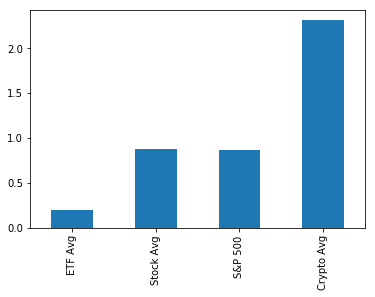

In [239]:
sharpe_ratios.plot.bar()